In [ ]:
import pandas as pd
import numpy as np
review = pd.read_csv('/content/TB300Gejala.csv', sep=",")
review

,Gejala,label
0,Saya merasa lega karena batuk yang sebelumnya ...,0
1,Tubuhku mulai mendapatkan energi kembali karen...,0
2,"Setelah beberapa waktu perawatan, saya mulai m...",0
3,Gejala batuk yang dulu menguras tenaga kini su...,0
4,Saya merasa bersyukur karena nafsu makan mulai...,0
...,...,...
325,"Demam tinggi, badan berkeringat dingin, kaku, ...",1
326,Keringat berlebihan dan batuk berdahak parah k...,1
327,Napas sangat tersengal saat aktivitas.,0
328,"Badan berkeringat dingin, batuk berdarah sedik...",0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Text Pre-processing

In [ ]:
pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 28.0 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=01a61c6fb59525a6806e892ce057fcac05c6d4fb8c3450ce20a54d08db80b343
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=ddefea26cb2a5f4d5d430382cf5315ccb45879f3f5620bef268c057a8239ad62
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.3
    Uninstalling pytest-7.4.3:
      Successfully uninstalled pytest-7.4.3


In [ ]:
import pandas as pd
import string
import re
import json
from nlp_id.tokenizer import Tokenizer
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer

In [ ]:
#import kamus bahasa baku
with open('/content/combined_slang_words.txt') as f:
    data0 = f.read()
print("Data type before reconstruction : ", type(data0))
formal_indo = json.loads(data0)
print("Data type after reconstruction : ", type(formal_indo))

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>


In [ ]:
def informal_to_formal_indo(text):
    res = " ".join(formal_indo.get(ele, ele) for ele in text.split())
    return(res)

In [ ]:
tokenizer = Tokenizer()
stopword = StopWord()
lemmatizer = Lemmatizer()

In [ ]:
def my_tokenizer(doc):
    doc = re.sub(r'@[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'#[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'RT[\s]', '', doc)
    doc = re.sub(r"http\S+", '', doc)
    doc = re.sub(r'[0-9]+', '', doc)
    doc = re.sub(r'(.)\1+',r'\1\1', doc)
    doc = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',doc)
    doc = re.sub(r'[^a-zA-Z]',' ', doc)
    doc = re.sub(r'\b(\w+)( \1\b)+', r'\1', doc)
    doc = doc.replace('\n', ' ')
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = doc.strip(' ')
    #Mengubah menjadi huruf kecil
    doc = doc.lower()
    #Text Normalization
    doc = informal_to_formal_indo(doc)
    #Punctuation Removal+Menghapus Angka
    doc = doc.translate(str.maketrans('', '', string.punctuation + string.digits))
    #Whitespace Removal
    doc = doc.strip()
    #Tokenization
    doc = tokenizer.tokenize(doc)
    doc_token1 = [word for word in doc]
    #Stopwords Removal
    doc_token2 = [word for word in doc_token1 if word not in stopword.get_stopword()]
    #Lemmatization
    doc_token3 = [lemmatizer.lemmatize(word) for word in doc_token2]
    return doc_token3

In [ ]:
#text  pre-processing
review['preprocessing'] = review['Gejala'].apply(my_tokenizer)
review[['Gejala', 'preprocessing']]

,Gejala,preprocessing
0,Saya merasa lega karena batuk yang sebelumnya ...,"[lega, batuk, ganggu]"
1,Tubuhku mulai mendapatkan energi kembali karen...,"[tubuh, ku, energi, napas, berat, ringan]"
2,"Setelah beberapa waktu perawatan, saya mulai m...","[rawat, rasa, tingkat, demam, muncul]"
3,Gejala batuk yang dulu menguras tenaga kini su...,"[gejala, batuk, uras, tenaga, kurang, nyaman]"
4,Saya merasa bersyukur karena nafsu makan mulai...,"[syukur, nafsu, makan, berat, badan, stabil]"
...,...,...
325,"Demam tinggi, badan berkeringat dingin, kaku, ...","[demam, badan, keringat, dingin, kaku, mati, b..."
326,Keringat berlebihan dan batuk berdahak parah k...,"[keringat, batuk, dahak, parah]"
327,Napas sangat tersengal saat aktivitas.,"[napas, sengal, aktivitas]"
328,"Badan berkeringat dingin, batuk berdarah sedik...","[badan, keringat, dingin, batuk, darah]"


In [ ]:
review1=review[['Gejala', 'preprocessing']]

In [ ]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(gejala) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in gejala:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

review['stemming_gejala'] = review['preprocessing'].apply(stemming)
review[['stemming_gejala']]

,stemming_gejala
0,lega batuk ganggu
1,tubuh ku energi napas berat ringan
2,rawat rasa tingkat demam muncul
3,gejala batuk uras tenaga kurang nyaman
4,syukur nafsu makan berat badan stabil
...,...
325,demam badan keringat dingin kaku mati belah
326,keringat batuk dahak parah
327,napas sengal aktivitas
328,badan keringat dingin batuk darah


In [ ]:
data = review[['stemming_gejala', 'label']]
data

,stemming_gejala,label
0,lega batuk ganggu,0
1,tubuh ku energi napas berat ringan,0
2,rawat rasa tingkat demam muncul,0
3,gejala batuk uras tenaga kurang nyaman,0
4,syukur nafsu makan berat badan stabil,0
...,...,...
325,demam badan keringat dingin kaku mati belah,1
326,keringat batuk dahak parah,1
327,napas sengal aktivitas,0
328,badan keringat dingin batuk darah,0


In [ ]:
data['label'].value_counts()

0    220
1    110
Name: label, dtype: int64

<Axes: ylabel='label'>

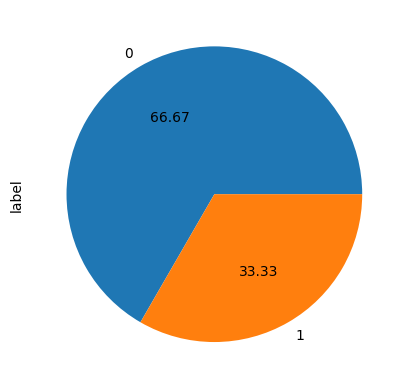

In [ ]:
data['label'].value_counts().plot.pie(autopct='%.2f')

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (264, 2)
Validation data shape: (33, 2)
Test data shape: (33, 2)


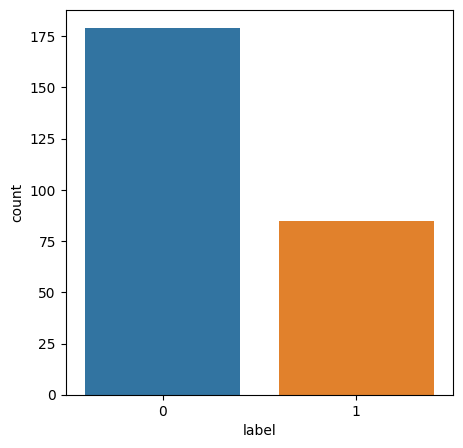

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

In [ ]:
df_train.to_csv('data_training.csv', index = False)

In [ ]:
data = pd.read_csv('data_training.csv')
data.head()

,stemming_gejala,label
0,gejala tbc batuk demam golong ringan,0
1,alam nyeri punggung hilang nafsu makan turun b...,1
2,mual muntah sulit makan berat badan turun,0
3,demam ringan badan keringat dingin kaku belah ...,0
4,bab lancar,0


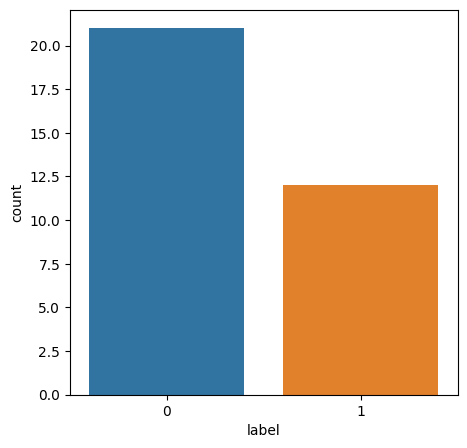

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

In [ ]:
df_val.to_csv('data_validasi.csv', index = False)

In [ ]:
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_gejala,label
0,nyeri dada batuk nyeri tajam tusuk nyeri napas,1
1,demam terus susah tidur badan lemah,0
2,benjol pecah keluar nanah darah,0
3,nyeri dada tajam aktivitas sulit siksa,1
4,demam pergi jelas ku takut kondisi sehat ku buruk,1


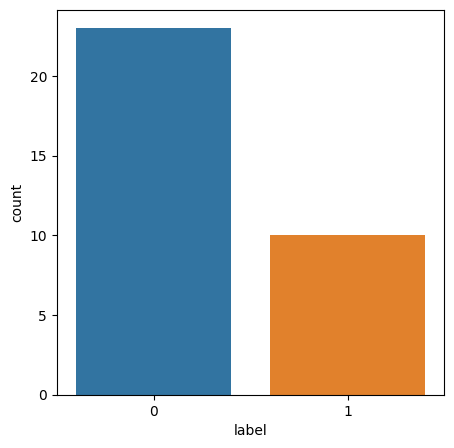

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
df_test.to_csv('data_testing.csv', index = False)

In [ ]:
data = pd.read_csv('data_testing.csv')
data.head()

,stemming_gejala,label
0,nyeri dada tajam aktivitas sulit siksa,1
1,napas sengal aktivitas,0
2,batuk jalan aktivitas normal,0
3,bab lancar,0
4,badan keringat dingin batuk darah,0


### Indobert Model

In [ ]:
#Modelling
!pip install transformers

In [ ]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))

Panjang vocabulary: 30521


In [ ]:
print(vocabulary)

{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '##ara': 85, '##and': 86, '#

In [ ]:
# Example of Tokenization
# Retrieve the 1st index data on the dataframe
print('Kalimat:', review['stemming_gejala'][0])
print('BERT Tokenizer:', bert_tokenizer.tokenize(review['stemming_gejala'][0]))

Kalimat: lega batuk ganggu
BERT Tokenizer: ['lega', 'batuk', 'ganggu']


In [ ]:
# Example of input formatting for BERT.
# Input formatting can use 'encode_plus' function
bert_input = bert_tokenizer.encode_plus(
    # Sample sentences
    review['stemming_gejala'][0],
    # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
    add_special_tokens = True,
    # Add padding to max_length using [PAD] token
    # jika kalimat kurang dari max_length
    padding = 'max_length',
    # Truncate if sentence is more than max_length
    truncation = 'longest_first',
    # Determine the max_length of the entire sentence
    max_length = 50,
    # Returns the attention mask value
    return_attention_mask = True,
    # Returns the value of token type id (segment embedding)
    return_token_type_ids =True)
# The function 'encode_plus' returns 3 values:
# input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# Original data
print('Kalimat\t\t:', review['stemming_gejala'][0]) #1 denotes first order data or first review data
                                                   # so for example I change it to 1000 still 1 data appears but the order is 1000th
# Input formatting + tokenizer return
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# Input IDs: token indexes in the tokenizer vocabulary
print('Input IDs\t:', bert_input['input_ids'])
# Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
print('Token Type IDs\t:', bert_input['token_type_ids'])
# Attention mask : returns value [0,1].
#1 means masked token, 0 tokens are not masked (ignored)
print('Attention Mask\t:', bert_input['attention_mask'])

Kalimat		: lega batuk ganggu
Tokenizer	: ['[CLS]', 'lega', 'batuk', 'ganggu', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 12476, 7178, 27635, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

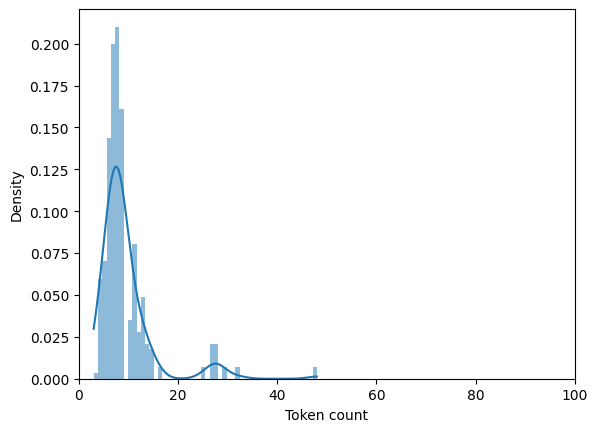

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# There are many ways to define max_length
# The intuition is that we don't want to cut sentences
# Or added too much padding (longer computation)

# In this example, max_length is determined from the distribution of tokens in the dataset
token_lens = []
for txt in review['stemming_gejala']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Create a function to combine tokenization steps
# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [ ]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=2)

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=3,
                              batch_size=32, validation_data=val_encoded)

Epoch 1/3
9/9 [==============================] - 166s 14s/step - loss: 0.4448 - accuracy: 0.8030 - val_loss: 0.1882 - val_accuracy: 0.9394
Epoch 2/3
9/9 [==============================] - 121s 13s/step - loss: 0.0870 - accuracy: 0.9697 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 3/3
9/9 [==============================] - 120s 13s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.6563 - val_accuracy: 0.8485
CPU times: user 10min 40s, sys: 24.6 s, total: 11min 4s
Wall time: 7min 43s


In [ ]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

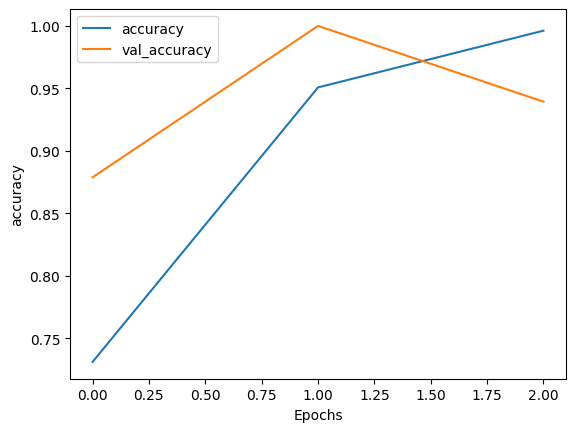

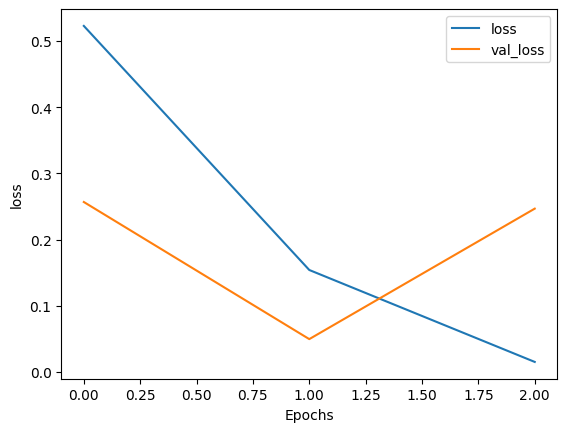

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
bert_model.save_weights('temanTB-model.h5')

In [ ]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

2/2 [==============================] - 4s 315ms/step - loss: 0.0095 - accuracy: 1.0000
Test Accuracy: 1.0
CPU times: user 7.52 s, sys: 47.2 ms, total: 7.57 s
Wall time: 4.21 s


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

2/2 [==============================] - 8s 192ms/step


In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

1.0

In [ ]:
confusion_matrix(y_true, y_pred)

array([[23,  0],
       [ 0, 10]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        10

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=2)
bert_load_model.load_weights('temanTB-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Sample text
input_text = 'saya batuk dan nyeri dada'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

In [ ]:
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

In [ ]:
sentiment_labels = ['negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [ ]:
print(input_text, ':', sentiment_labels[label[0]])

saya batuk dan nyeri dada : positif
